<a href="https://colab.research.google.com/github/jaikishanjayakumar/MachineIntelligenceandBrainResearch/blob/main/Wk5%3AClassical_Machine_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![picture](https://drive.google.com/uc?export=view&id=1-HwoOx645-DW51QsJLKE1FzvIXVyKQqj)

#Machine Intelligence and Brain Research
*Center for Computational Brain Research, Indian institute of Technology Madras*





#Week 3 Classical Machine Vision

<b> Introduction</b>
<p><strong>Welcome!</strong> This material is designed to walk you through some of the basics of Classical Machine Vision. The information presented here is quite basic but forms an imporant foundation for introducing you to classical Computer Vision using Opencv library for concepts like Edge detection, Local feature extractors and descriptors and Image thresholding. This is a working notebook and helps you to systematically work through some of the concepts as discussed in class.</p> 


## Structure of this Tutorial

1. At first, we are going to **import the dependencies** and look through some of the **basics of OpenCV** so that we can work with images.
2. Quick recap of **edge detection** followed by using **Sobel** and **Canny Edge** detectors in OpenCV
3. Recap of **Local Feature descriptors**. Working example of **Harris Corner detection**.
4.**Image Segmentation**: In this section we will understand how the simple technique of image thresholding can be used for segementation. We will understand and work with **Otsu's thresholding**.
5. **Programming Exercise**: At the end, we provide a simple exercise to check some of the basic concepts.



Estimated time of Completion = 2 hrs

## Dependencies

The following are python dependencies which we will use for this lesson are all imported below

In [ ]:
# cv2 is the opencv library which has many useful functions that we will be using 
import cv2

# Note: cv2.imshow() causes google colab session to crash, so we cannot use it. A patch has been made available and we can import it as follows:
from google.colab.patches import cv2_imshow

# we use matplotlib for visualizations and reading images
import matplotlib.pyplot as plt

# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, 
# along with a large collection of high-level mathematical functions to operate on these arrays.
import numpy as np

from skimage import io

## Basics of OpenCV

### Reading and showing images


To read the images, we will be using io.imread() method in this tutorial. This method loads an image from the specified file. If the image cannot be read (because of missing file, improper permissions, unsupported or invalid format) then this method returns an empty matrix.

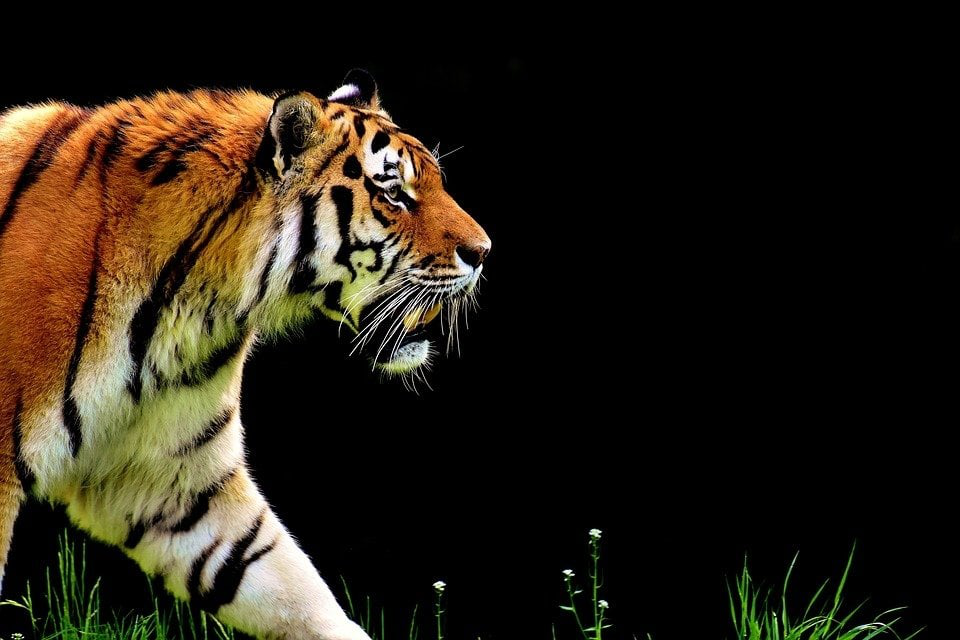

In [ ]:
url = 'https://raw.githubusercontent.com/GuptaSonam/CCBR2021/main/tiger_image.jpg'
img = io.imread(url) #For reading the image in BGR format
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Converts image from BGR to RGB format
cv2_imshow(img)

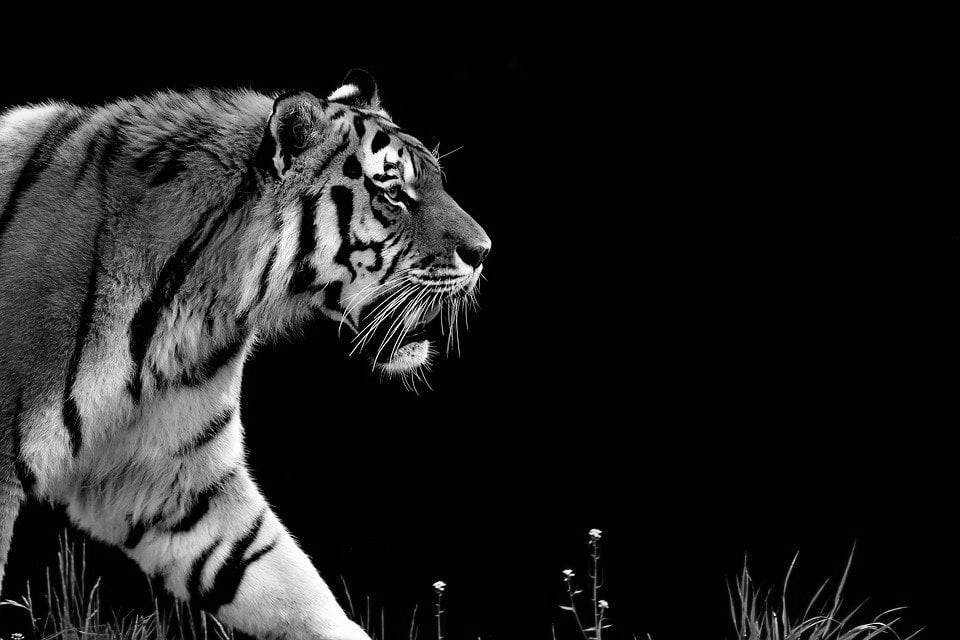

In [ ]:
# We can convert the image to grayscale image using opencv cv2.cvtColor

url = 'https://raw.githubusercontent.com/GuptaSonam/CCBR2021/main/tiger_image.jpg'
img = io.imread(url)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #Converts image from BGR to GRAY format 

cv2_imshow(img)


### Adding Gaussian Noise to an Image 

In this exercise, we will add Gaussian noise to an image. Following this we will see how different filters can be used to remove the noise and obtain a clean image. 

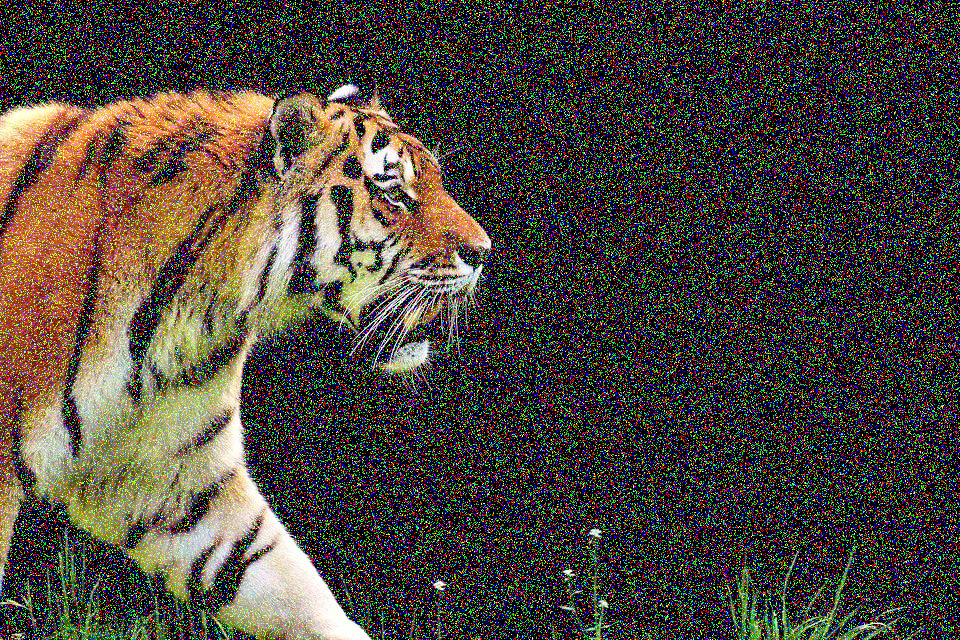

In [ ]:
import cv2
import numpy as np

url = 'https://raw.githubusercontent.com/GuptaSonam/CCBR2021/main/tiger_image.jpg'
image = io.imread(url)

# Generate Gaussian noise
gaussian_noise = np.random.normal(0,1,image.size) #Parameters:  mean = 0, standard deviation = 1, image.size = image width * image height * no. of channels
gaussian_noise = gaussian_noise.reshape(image.shape[0],image.shape[1],image.shape[2]).astype('uint8') #Reshaping the Gaussian noise array to the shape of the image 

# Add the Gaussian noise to the image
image_gaussian = cv2.add(image,gaussian_noise) 

# Display the image
image_gaussian = cv2.cvtColor(image_gaussian, cv2.COLOR_BGR2RGB)
cv2_imshow(image_gaussian)


###Gaussian Filter
The Gaussian Filter involves a weighted average of the surrounding pixels and has a parameter sigma. 
The kernel represents a discrete approximation of a Gaussian distribution.

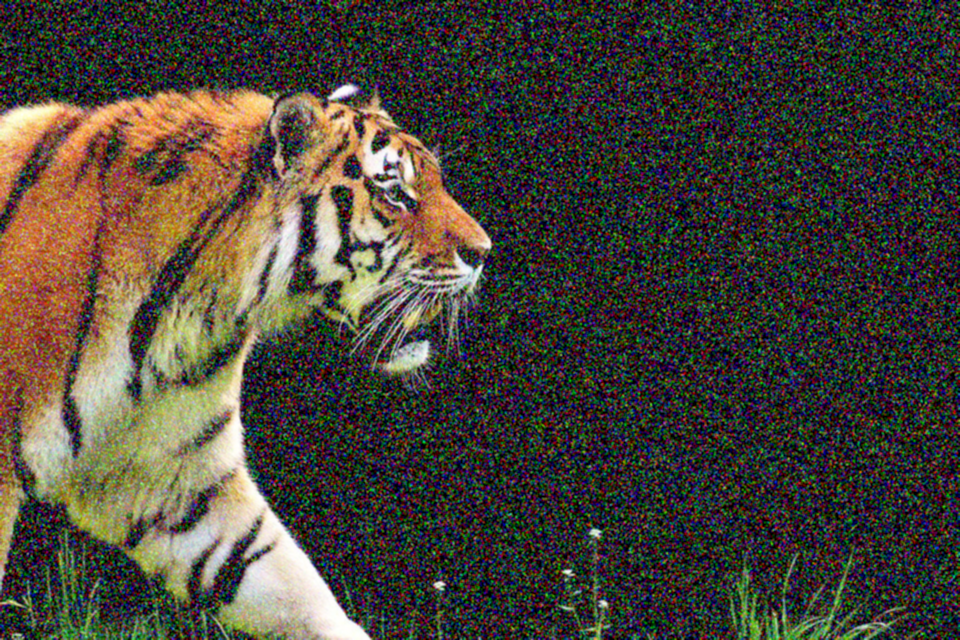

In [ ]:

#Define kernel size
kernel_size = 3

#Apply Gaussian filter on the noisy image
new_img = cv2.GaussianBlur(image_gaussian, (kernel_size, kernel_size),1) #Parameters: Kernel shape = 3*3 ,standard deviation = 1, image_gaussian = Noisy image

#Display the image
cv2_imshow(new_img)

###Median Filter
The median filter calculates the median of the pixel intensities that surround the center pixel in a n x n kernel. The median then replaces the pixel intensity of the center pixel. The median filter preserves the edges of an image and does a better job for removal of salt and pepper noise than Gaussian filter.

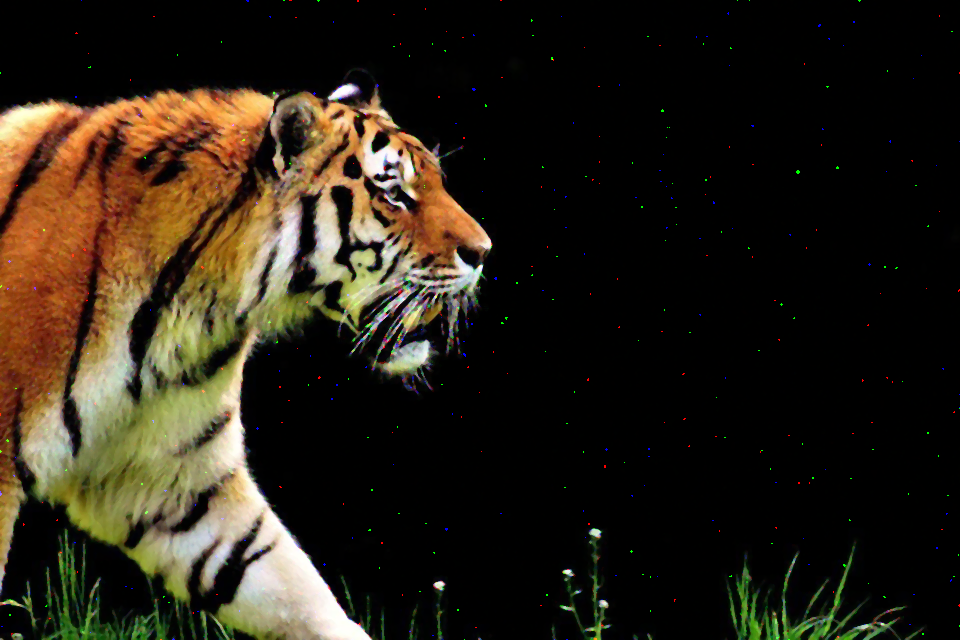

In [ ]:

#Define kernel size
kernel_size = 3

#Apply Median filter on noisy image (image_gaussian)
new_image = cv2.medianBlur(image_gaussian, kernel_size ) 
#Apply Median filter for the second time on the new_image (the image obtained after applying median filter for the first time)
new_image2 = cv2.medianBlur(new_image, kernel_size )

#Display the image
cv2_imshow(new_image2)

## Concepts in Edge Detection

The early stages of image processing identify features in images that are
relevant to estimating the structure and properties of objects in a scene.
Edges are one such feature. Edges are significant local changes in the image
and are important features for analyzing images.

Edge detection is a technique of image processing used to identify (edges) points in a digital image with discontinuities, sharp changes in the image intensities. These points where the image intensity varies sharply are called the edges (or boundaries) of the image.

When we process very high-resolution digital images, convolution techniques are used to perform edge detection. 

In fact, many image processing tasks such as blurring, sharpening, and edge detection can be implemented using a convolution between an image and a matrix of numbers (or kernel). The figure below illustrates a 3×3 kernel that implements a smoothing filter, which replaces each pixel value in an image with the mean average value of its neighbors including itself. ([Image source](https://www.imaginationtech.com/blog/heterogeneous-compute-case-study-image-convolution-filtering/))

![picture](https://drive.google.com/uc?export=view&id=1wXVcBGGr8tXy8gxeIFNCj8BIIKH13MfQ)

The numbers in the kernel can be changed according to our need to control the amount of smoothening (blurring).



### Edge Detectors







There are various methods in edge detection, and following are some of the most commonly used methods:


*   Sobel edge detection
*   Canny edge detection
*   Laplacian edge detection
*   Prewitt edge detection

We will now explore the first two in detail.


#### Sobel Edge Detector





This method uses a filter that gives more emphasis to the centre of the filter. It is one of the most commonly used edge detectors and helps reduce noise and provides differentiating edge response simultaneously.

These are the kernels used for Sobel Edge Detection:

\begin{equation*} \begin{bmatrix} -1 & 0 & +1 \\ -2 & 0 & +2 \\ -1 & 0 & +1 \end{bmatrix} \end{equation*}  

<h5><center>X-Direction Kernel</center></h5>


\begin{equation*} \begin{bmatrix} +1 & +2 & +1 \\ 0 & 0 & 0 \\ -1 & -2 & -1 \end{bmatrix} \end{equation*}
<h5><center>Y-Direction Kernel</center></h5>

When these kernels are convolved with the original image, you get a ‘Sobel edge image’. 
*   If we use only the Vertical Kernel, the convolution yields a Sobel image, with edges enhanced in the X-direction.
*   Using the Horizontal Kernel yields a Sobel image, with edges enhanced in the Y-direction.



1. We have used cv2.Sobel() function for Sobel edge detection. 
Parameters: src: image, ddepth: output image depth, dx: 	order of the derivative x, dy: order of the derivative y, ksize: Size of kernel
2. cv2.Sobel() documentation  [link](https://docs.opencv.org/4.5.3/d4/d86/group__imgproc__filter.html#gacea54f142e81b6758cb6f375ce782c8d)

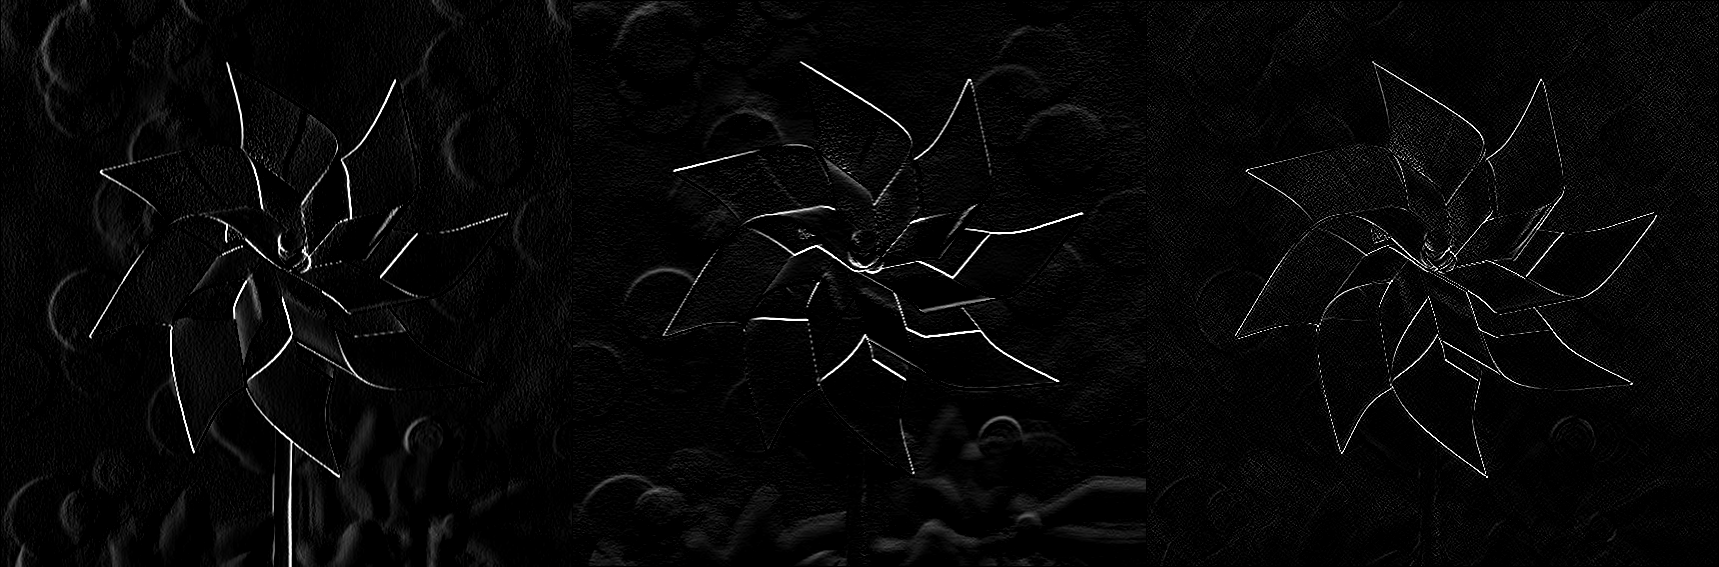

In [ ]:
# Sobel Edge detection using openCV 
import numpy as np

url = 'https://raw.githubusercontent.com/GuptaSonam/CCBR2021/main/flower.png'
img = io.imread(url)
img = image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sobelx = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=3) # Combined X and Y Sobel Edge Detection

#Concatenating all 3 outputs
concat = np.concatenate((sobelx, sobely, sobelxy*3), axis=1)
cv2_imshow(concat)

#### Canny Edge Detector










This is the most commonly used highly effective and complex compared to many other methods. It is a multi-stage algorithm used to detect/identify a wide range of edges. The following are the various stages of the Canny edge detection algorithm-


1.   **Grayscale conversion:** Convert the image to grayscale.
2.   **Reduce noise:** 
Since edge detection is based on derivatives, its results are highly sensitive to image noise. One way to get rid of the noise in the image, is by applying Gaussian blur to it. To do so, image convolution technique is applied with a Gaussian Kernel (3x3, 5x5, 7x7). The kernel size depends on the expected blurring effect. Basically, smaller the kernel, lesser is the blurring effect.
The equation for a Gaussian filter kernel of size (2k+1)×(2k+1) is given by: 
\begin{equation*} H_{ij} = \frac{1}{2\pi\sigma^{2}} \exp{(-\frac{(i - (k+1))^{2} + (j - (k+1))^{2}}{2\sigma^{2}})}; 1 \leq i,j \leq (2k+1) \end{equation*}

3.   **Calculate the gradient:** This step involves identification of edge intensities and edge directions. After the image is smoothed, the derivatives with respect to x-direction and y-direction are calculated. It can be implemented by convolving the image with Sobel kernels. Then, the magnitude (G) and the slope ($\theta$) of the gradient are calculated as follow:
\begin{equation*} |G| = \sqrt{I_{x}^{2} + I_{x}^{2}} \end{equation*}
\begin{equation*} \theta{(x,y)} = arctan(\frac{I_{y}}{I_{x}}) \end{equation*}
Here, $I_{x}$ and $I_{y}$ represent gradient intensities in x and y direction respectively.
4.   **Non-maximum suppression:** Ideally, the final image should have thin edges. However in reality, some of the edges are brighter than the others. Thus, to overcome this problem, we usually perform non-maximum suppression to thin out the edges.
5.   **Double threshold:**  This step tries to identify the strong, weak and irrelevant pixels in the images.
6.   **Hysteresis edge tracking:** Based on the values assigned to each pixel in the previous step, this step helps us convert the weak pixels into strong ones only if they have a strong pixel around them.


OpenCV puts all the above in single function, cv2.Canny(). We will see how to use it. 

*   First argument is our input image.
*   Second and third arguments are our minVal and maxVal respectively.
*   Third argument is aperture_size. It is the size of Sobel kernel used for find image gradients. By default it is 3.
*   Last argument is L2gradient which specifies the equation for finding gradient magnitude. If it is True, it uses the equation mentioned above which is more accurate, otherwise it uses this function: Edge\_Gradient \; (G) = |G_x| + |G_y|. By default, it is False.









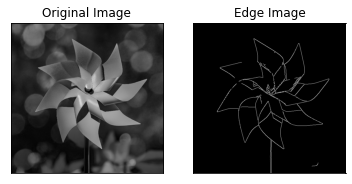

In [ ]:
# Canny Edge detection using openCV 
# Image source - https://towardsdatascience.com/edge-detection-in-python-a3c263a13e03

url = 'https://raw.githubusercontent.com/GuptaSonam/CCBR2021/main/flower.png'
img = io.imread(url)
img = image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

##Some key intermediate steps:

Gradient intensity and slope of gradients

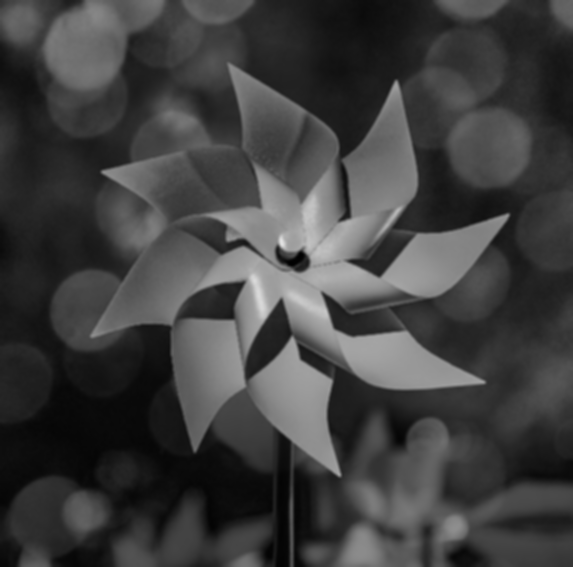

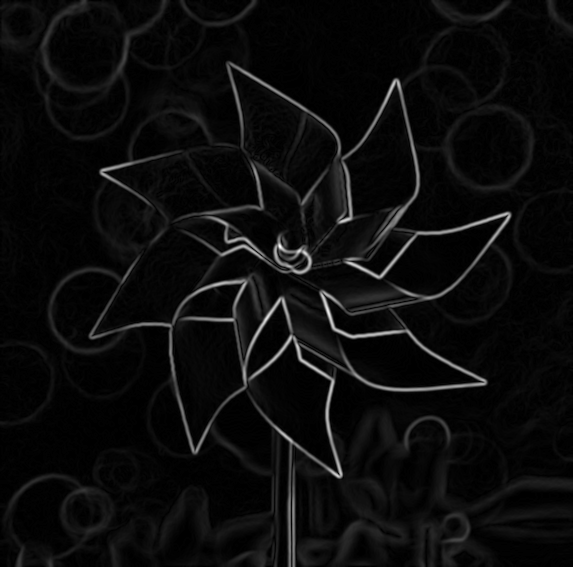

In [ ]:
from scipy import ndimage

def sobel_filters(img):
    
    Ix = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3) #Apply Sobel edge detector for vertical edges
    Iy = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3) #Apply Sobel edge detector for horizontal edges
    G = np.hypot(Ix, Iy) #Calculate Gradient intensity matrix
    G = G / G.max() *255 
    theta = np.arctan2(Iy, Ix) #Calulate Slope of Gradient matrix
    
    return (G, theta)


url = 'https://raw.githubusercontent.com/GuptaSonam/CCBR2021/main/flower.png'
img = io.imread(url)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
kernel_size = 5

#Apply Gaussian filter on the noisy image
new_img = cv2.GaussianBlur(img, (kernel_size, kernel_size),1.4)
cv2_imshow(new_img)

#Gradient intensity and slope of gradient
G, theta = sobel_filters(new_img)

# print("Gradient",G)
cv2_imshow(G)

Non Maximal Suppression

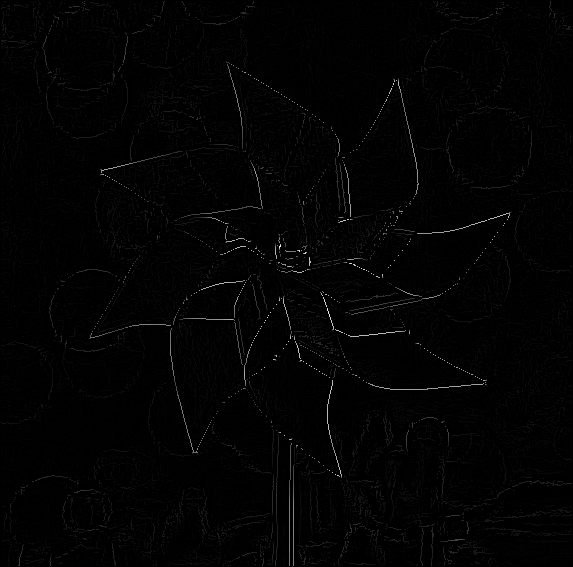

In [ ]:

#Non Maximal suppression
def non_max_suppression(img, D):
    M, N = img.shape
    Z = np.zeros((M,N), dtype=np.int32) #Creating a mask of same size of the image with intial values as zeros
    angle = D * 180. / np.pi #Converting the angle matrix from radian to degrees
    angle[angle < 0] += 180

    
    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                q = 255
                r = 255
                
               #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = img[i, j+1]
                    r = img[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = img[i+1, j-1]
                    r = img[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = img[i+1, j]
                    r = img[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = img[i-1, j-1]
                    r = img[i+1, j+1]

                if (img[i,j] >= q) and (img[i,j] >= r):
                    Z[i,j] = img[i,j]
                else:
                    Z[i,j] = 0

            except IndexError as e:
                pass
    
    return Z

Z = non_max_suppression(G, theta)
cv2_imshow(Z)

## Local Feature Descriptors

A feature usually corresponds to some unique (in the neighbourhood only) information in the image which is useful for solving Computer Vision tasks like image matching, object detection, tracking etc. In other words, a feature corresponds to a pattern or distinct structure in an image such as corners, edges or blobs. They are usually associated with an image patch which is different from the patches surrounding it. 

Some of the desirable properties of good local features are as follows: 
1. **Distinctive**: Different from the immediate neighbourhood
2. **Localizable**: The featre should have unique location associated with it.
3. **Robust**: The features should be robust to noise, illumination, scaling.

A local feature descriptor is a compact vector representation of the feature. Following are few examples of different local feature detectors:

* Harris Corner Detector 
* Hessian Corner Detector
* Laplacian of Gaussian Detector 
* Difference of Gaussian Detector

Now we will explore each of this using examples.

### Harris Corner Detection

A corner is a region in the image where there is a large variation in intensity in orthogonal directions. The key in determining Harris corner is the second moment matrix given below:

\begin{equation*} H = \begin{bmatrix}  \sum{I_xI_x}& \sum{I_xI_y} \\ \sum{I_xI_y} & \sum{I_yI_y}  \end{bmatrix} \end{equation*}

where $I_x$ is the gradient with respect to $x$ and $I_y$ is the gradient with respect to $y$. We can see that $H$ is symmetric and thus orthogonally diagonalizable (property of orthogonal matrix). This means we can write $H$ as:
\begin{equation*} H = A^{-1} \begin{bmatrix}  \lambda_1 & 0 \\ 0 & \lambda_2 \end{bmatrix} A\end{equation*}
Here, $\lambda_1$ and $\lambda_2$ are called as the eigen values of $H$. The eigen values gives the direction of change as illustrated in figure below.


![picture](https://raw.githubusercontent.com/GuptaSonam/CCBR2021/main/eigen_values.png)

So, how can we use $H$ for finding corners?

We use the eigen values of H to determine the corners. 
Following image summarizes the interpretation of $H$ using eigen values.
![picture](https://drive.google.com/uc?export=view&id=1MscmNlmQdwAfO7jZFKPqep9yhptHsuBD)

Based on the neighbourhood of a pixel, we obtain the second-moment matrix $H$. Then we observe the eigen values of this matrix. If both the eigenvalues are large then the pixel is detected as a corner otherwise not.

How to decide which values should be considered large?

Following is the equation used to decide whether a point is corner or not:
$R = det(H) - \alpha trace(H)^2 = \lambda_1 \lambda_2 - \alpha(\lambda_1 + \lambda_2)^2$ \\
Here, $0 \leq \alpha \leq 1$

To summarize, following are the steps that will be used for Harris corner detection:

* Given an input image, compute the derivatives along x-axis, $I_x$ and along y-axis, $I_y$.
* Compute $I_x^2$, $I_y^2$ and $I_xI_y$. 
* Perform Gaussian smoothing i.e. find $G(I_x^2)$, $G(I_y^2)$ and $G(I_xI_y)$ (This ensures that the result is rotation invariant).
* Compute $R$ as described above.



#### Harris Corner Detection in OpenCV

In this subsection we see how we can use OpenCV library function to detect the corners of an image using Harris Corner Detection Method.  OpenCV provides the function cv2.cornerHarris() for this purpose. It takes following arguments:

* img - Input image of type grayscale and float32.
* blockSize - This corresponds to the size of the neighbourhood considered for corner detection.
* ksize - Aperture parameter of Sobel derivative filter.
* k - Harris detector free parameter in the equation. 

You can read more about this in detail at [link](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html).

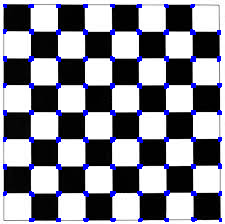

In [ ]:
# Illustration of Harris Corner Detection Method
# using OpenCV library in Python
  
# read image
url = 'https://raw.githubusercontent.com/GuptaSonam/CCBR2021/main/chess.jfif'
image = io.imread(url)
  
# convert the input image to grayscale image and float32 type
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  
image_gray = np.float32(image_gray)
  
# apply the cv2.cornerHarris method
# to detect the corners with appropriate
# values as input parameters
out = cv2.cornerHarris(image_gray, 2, 3, 0.08)
  
# Marking the results uusing the dilated corners
out = cv2.dilate(out, None)
  
# Reverting back to the original image,
# with optimal threshold value
image[out > 0.01 * out.max()]=[0, 0, 255]
  
# Display the resulting image
image =  cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2_imshow(image)


### Hessian Corner Detection

The Hessian Corner detector is similar to Harris Corner Detector. The major difference is that, instead of using second-moment matrix that consists of first derivatives, it uses Hessian Matrix. The Hessian matrix consists of second derivatives as shown below:

\begin{equation*} H = \begin{bmatrix}  I_{xx}& I_{xy} \\ I_{xy} & I_{yy}  \end{bmatrix} \end{equation*}



## Image Segmentation

Segmentation is the process of decomposing an image into parts (aka segments) for further analysis. For Eg: Foreground and background. Generally, an image is segmented into regions corresponding to objects. All pixels in a regions shares a common property. One of the simplest properties that can be shared is intensity. Thus, the simplest possible segmentation that can be done is by using image thresholding. Image thresholding is used to binarize an image based on pixel intensity values. In this tutorial, we will be using image thresholding for binary segmentation of image. But before diving into that, for completing the discussion lets list the different types of segmentation algorithms that are there.

Types of Segmentation Algorithms:

* Thresholding
* Clustering
* Edge-based Segmentation
* Region-based Segmentation
* Deep Learning based Segmentation

In this tutorial, we will restrict our discussion to segmentation using image thresholding. Image thresholding can be further divided into local and global image thresholding algorithms. In global image thresholding algorithms, single threoshold value is used to divide the entire image. In contrast, for local thresholding, different thresholds are chosen for different parts of the image based on local image characterstics (For Eg: Contrast). 

We will be looking into Otsu's method which is a global thresholding algorithm. 

### Otsu's Thresholding

The algorithm can be summarized as follows:

* Convert the input image into grayscale image.
* Compute image historgram
* Compute the value of threshold $T$ for the image
* Replace each pixel having value less than or equal to $T$ with 0 and pixel having value greater than $T$ with 1.

First, we will use a simple image with one object (Saturn in this case) image to see how thresholding works. After that we will use the flower image which we had used for edge detection as a sample image and try to perform segmentation using thresholding. At first, we will load the image using the code below. 



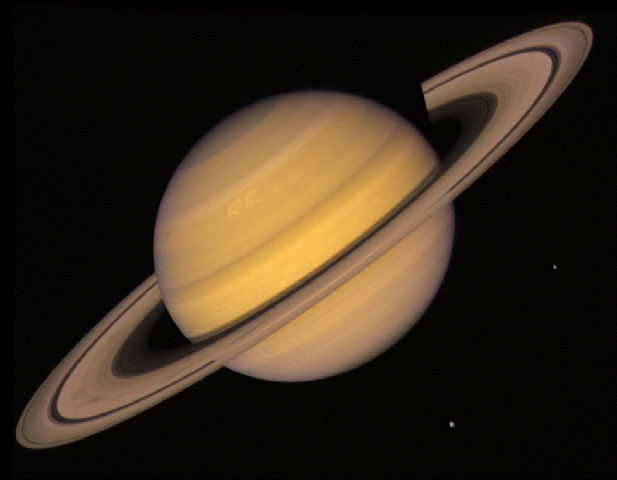

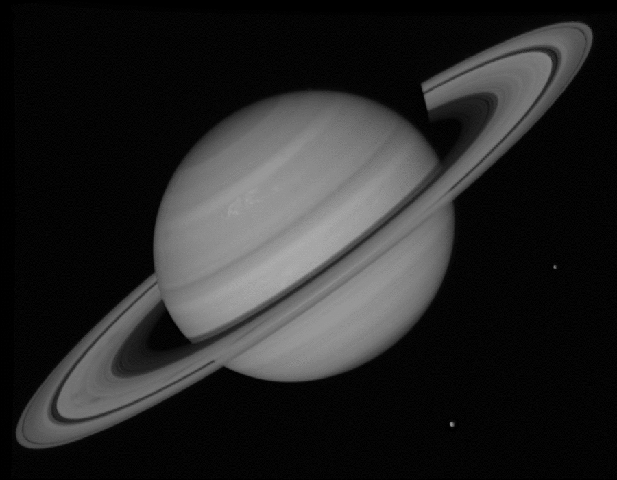

In [ ]:
url = 'https://raw.githubusercontent.com/GuptaSonam/CCBR2021/main/saturn.gif'
img = io.imread(url)
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(image)
img =  cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img)

As it was a color image, we need to convert it to grayscale first. Now, let's compute the histogram of the image to get a sense of how the pixels intensities are distributed. 

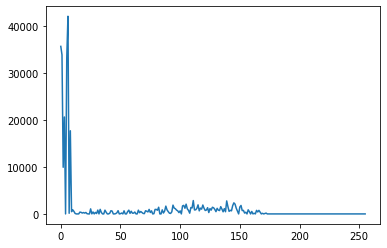

In [ ]:
# find frequency of pixels in range 0-255.
# We have used cv2's calcHist function to compute the histogram. 
# It takes 5 arguments as cv2.calcHist(image, channel, mask, histSize, ranges)
# image: input image
# channel: image channel for which hostogram is to be computed. For grayscale image, this will be [0]
# mask: used when you wish to compute histogram for a portion of image only. For full image, set this to None 
# histSize: Number of bins in the histogram
# ranges : The range of pixel values in input

histr = cv2.calcHist([img],[0],None,[256],[0,256])
  
# plotting histogram using matplotlib
plt.plot(histr)
plt.show()

From the histogram, we can observe that there are two peaks. The performance of a thresholding algorithm depends heavily upon the threshold value. To understand the importance of threshold value, let's choose the threshold manually. From the histogram we can see that any value between 20 to 80 should be a good threshold to divide the image into two regions. Let's choose the threshold to be 40 and apply this manual thresholding and check the results.


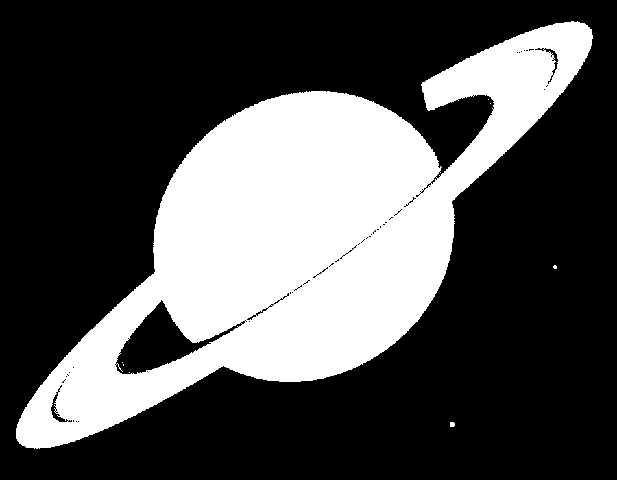

In [ ]:
# applying different thresholding
# techniques on the input image
# all pixels value above 90 will
# be set to 255
ret, thresh1 = cv2.threshold(img, 40, 255, cv2.THRESH_BINARY)

# the window showing output images
# with the corresponding thresholding
# techniques applied to the input images
cv2_imshow(thresh1)


We can see that we get a good segmented image. However, this threshold value need not work well with another image. We would encourage you to change the threshold above and see how it affects the output. Choosing the threshold manually everytime the input image changes is tedious. Therefore, Otsu's method was proposed by Nobuyuki Otsu which auto selects the threshold. The basic idea is that the image histogram can be divided into two clusters say foreground (corresponding to the object) and background using a threshold $T$ which maximizes the between class variance $\sigma_B^2$ between the two clusters defined as below,  
$\sigma_B^2 = W_b W_f (\mu_b - \mu_f)^2$.

Here, $W_b$(or $W_f) =  \frac{\text{No. of pixels in background (foreground)}}{\text{Total number of pixels}}$ i.e. the probabilities of a pixel being background (or foreground).

$\mu_b$ or $(\mu_f)$ is the mean intensity of backgrond (or foreground)

The process of selecting the threshold can be summarized as:

1.   Calculate the histogram and intensity level probabilities
2.   Initialize $W_b, W_f, \mu_b, \mu_f$
3.   Iterate over all possible thresholds, $T = 0, 1, 2, .., max$ ($max$ is the maximal intensity value in the image)
       * update the values of $W_b, W_f, \mu_b, \mu_f$
       * calculate the value of between-class variance $\mu_B^2$
4.   The threshold value for which maximum variance is obtained is the optimal threshold.     

Let's compute the Otsu's threshold now. OpenCV provides different flag values for cv2.threshold function. For otsu's method, this falg value needs to be cv2.THRESH_OTSU.


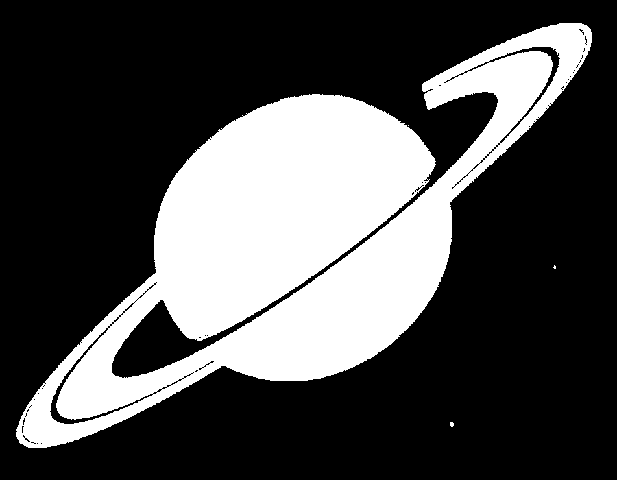

[INFO] otsu's thresholding value: 61.0


In [ ]:
# calculate Otsu's threshold
otsu_threshold, image_result = cv2.threshold(
    img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU,
)

cv2_imshow(image_result)
print("[INFO] otsu's thresholding value: {}".format(otsu_threshold))


We see that Otsu's method performs way better than the trial and error/manual thresholding. See how clearly the textures in the ring of the Saturn are separated. In general, Otsu's method works with bimodal distributions. If the number of modes in an image are more than 2, then the Otsu's method can run on the input but it might not be able to give us the desired results. We encourage you to try Otsu's thresholding on the image in the below snippet.

In [ ]:
url = 'https://raw.githubusercontent.com/GuptaSonam/CCBR2021/main/flower.png'
img = io.imread(url)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(img)
img = image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img)

# Compute the Histogram. USe calcHist command below to compute the histogram
# <To be done by you> histr = 

# plotting histogram using matplotlib
plt.plot(histr)
plt.show()

# Apply Otsu's Thresholding
# <To be done by you>


## Programming Exercise

This is an exercise for implementation of Canny Edge detection using python, you have been provided with several helper functions and your task is to perform canny edge detection with the help of these helper functions.


In [ ]:
### Helper functions

# Applies gaussian blur
# returns image after applying gaussian blur
def gaussian_blur(img):
  return cv2.GaussianBlur(img, (5, 5), 1.4)

# Calculates gradient magnitudes and directions
# returns calculated gradient magnitudes and directions 
def gradients_mag_dir(img):
  gx = cv2.Sobel(np.float32(img), cv2.CV_64F, 1, 0, 3)
  gy = cv2.Sobel(np.float32(img), cv2.CV_64F, 0, 1, 3)
  
  # Conversion of Cartesian coordinates to polar
  mag, ang = cv2.cartToPolar(gx, gy, angleInDegrees = True)
	
  return (mag, ang)
 
# Performs Non-max suppression
# returns gradient magnitudes and directions obtained after applying non-max suppression
def non_max_suppression(img, mag, ang):
  # getting the dimensions of the input image
  height, width = img.shape
	
	# Looping through every pixel of the grayscale
	# image
  for i_x in range(width):
    for i_y in range(height):
      grad_ang = ang[i_y, i_x]
      grad_ang = abs(grad_ang-180) if abs(grad_ang)>180 else abs(grad_ang)
			
			# selecting the neighbours of the target pixel
			# according to the gradient direction
			# In the x axis direction
      if grad_ang<= 22.5:
        neighb_1_x, neighb_1_y = i_x-1, i_y
        neighb_2_x, neighb_2_y = i_x + 1, i_y
			
			# top right (diagonal-1) direction
      elif grad_ang>22.5 and grad_ang<=(22.5 + 45):
        neighb_1_x, neighb_1_y = i_x-1, i_y-1
        neighb_2_x, neighb_2_y = i_x + 1, i_y + 1
			
			# In y-axis direction
      elif grad_ang>(22.5 + 45) and grad_ang<=(22.5 + 90):
        neighb_1_x, neighb_1_y = i_x, i_y-1
        neighb_2_x, neighb_2_y = i_x, i_y + 1
			
			# top left (diagonal-2) direction
      elif grad_ang>(22.5 + 90) and grad_ang<=(22.5 + 135):
        neighb_1_x, neighb_1_y = i_x-1, i_y + 1
        neighb_2_x, neighb_2_y = i_x + 1, i_y-1
			
			# Now it restarts the cycle
      elif grad_ang>(22.5 + 135) and grad_ang<=(22.5 + 180):
        neighb_1_x, neighb_1_y = i_x-1, i_y
        neighb_2_x, neighb_2_y = i_x + 1, i_y
			
			# Non-maximum suppression step
      if width>neighb_1_x>= 0 and height>neighb_1_y>= 0:
        if mag[i_y, i_x]<mag[neighb_1_y, neighb_1_x]:
          mag[i_y, i_x]= 0
          continue
      
      if width>neighb_2_x>= 0 and height>neighb_2_y>= 0:
        if mag[i_y, i_x]<mag[neighb_2_y, neighb_2_x]:
          mag[i_y, i_x]= 0
  return (mag, ang)

# Performs double thresholding 
# returns gradient magnitudes after applying double thresholding
def double_thresh(img, mag, weak_th, strong_th):
  # setting the minimum and maximum thresholds
	# for double thresholding
  mag_max = np.max(mag)
  if not weak_th:weak_th = mag_max * 0.1
  if not strong_th:strong_th = mag_max * 0.5
  
  weak_ids = np.zeros_like(img)
  strong_ids = np.zeros_like(img)			
  ids = np.zeros_like(img)
	
  height, width = img.shape
	
	# double thresholding step
  for i_x in range(width):
    for i_y in range(height):
      grad_mag = mag[i_y, i_x]
      if grad_mag<weak_th:
        mag[i_y, i_x]= 0
      elif strong_th>grad_mag>= weak_th:
        ids[i_y, i_x]= 1
      else:
        ids[i_y, i_x]= 2
  return mag

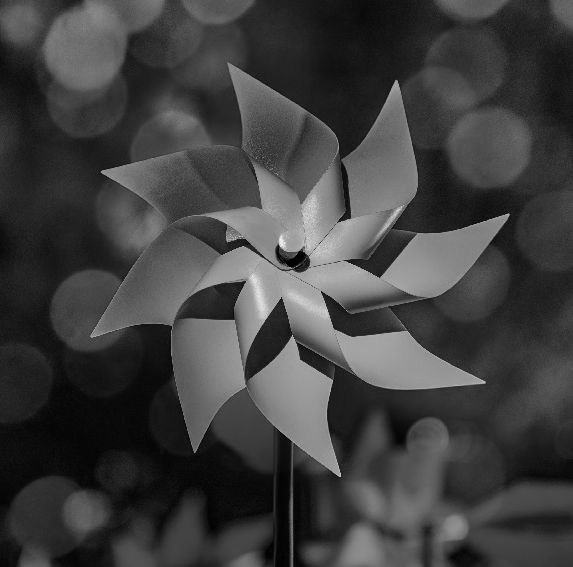

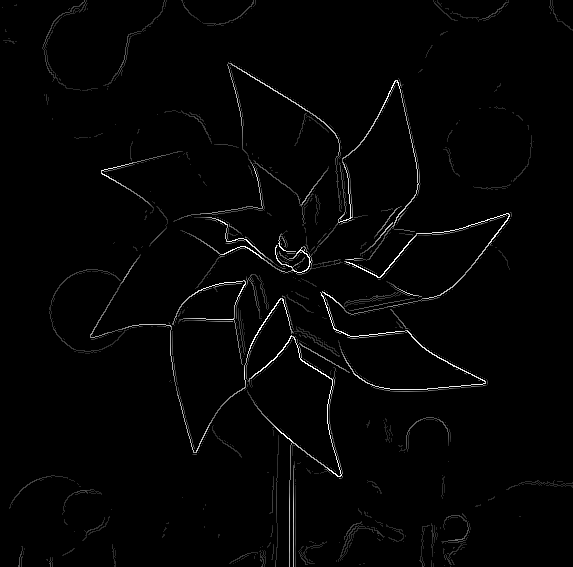

In [ ]:
# defining the canny detector function
# here weak_th and strong_th are thresholds for double thresholding step
def Canny_detector(img, weak_th = None, strong_th = None):
  # Your task is to complete this function
  # Answer start
  
  return mag
  # Answer end


url = 'https://raw.githubusercontent.com/GuptaSonam/CCBR2021/main/flower.png'
image = io.imread(url)

# convert the input image to grayscale image and float32 type
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  
canny_img = Canny_detector(img)

# Displaying the input and output image
cv2_imshow(img)
cv2_imshow(canny_img)


### Answer to the Exercise Above

In [ ]:
# Answer to the Exercise Above
# defining the canny detector function
# here weak_th and strong_th are thresholds for double thresholding step
def Canny_detector(img, weak_th = None, strong_th = None):
  # Your task is to complete this function
  # Answer start
  img = gaussian_blur(img)
  (mag, ang) = gradients_mag_dir(img)
  (mag, ang) = non_max_suppression(img, mag, ang)
  mag = double_thresh(img, mag, weak_th, strong_th)
  return mag
  # Answer end

url = 'https://raw.githubusercontent.com/GuptaSonam/CCBR2021/main/flower.png'
image = io.imread(url)

# convert the input image to grayscale image and float32 type
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  
canny_img = Canny_detector(img)

# Displaying the input and output image
cv2_imshow(img)
cv2_imshow(canny_img)


Now, try changing the input images. You can use following image urls and see how the Canny edge detection performs.

url1 = 'https://raw.githubusercontent.com/GuptaSonam/CCBR2021/main/chess.jfif'


url2 = 'https://raw.githubusercontent.com/GuptaSonam/CCBR2021/main/tiger_image.jpg'

## Conclusion

In this notebook we have explored the basic concepts in classical vision like Edge detection, Corner detection and Image Thresholding. We hope that this will be a starting point. 

Developed by Sonam Gupta, Binoy Saha and Shivangi Shreya, Department of Computer Science and Engineering, Indian Institute of Technology Madras.

All rights reserved